In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import couchdb

import urllib2, base64
from subprocess import Popen, PIPE
import soundfile as sf

import h5py

from tools.audio import butterLpass

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
%matplotlib notebook

In [8]:
# Plot parameters
plt.style.use('ggplot')
plt.rcParams['axes.facecolor']='w'

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 5)

Populating the interactive namespace from numpy and matplotlib


/Users/lsp/.virtualenvs/eeg/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['fftpack']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [10]:
from scipy import signal, fftpack

In [11]:
f = h5py.File('TRF.h5', 'r')
print f.keys()
dataFilt3DSSR = np.array(list(f['eeg_aSSR_hijee_18_06']))

[u'eeg_aSSR_hijee_18_06', u'eeg_hijee_18_06', u'envAttended_hijee_18_06']


In [12]:
audio, fs = sf.read('test13.wav')
trialLenFastHilbert = fftpack.next_fast_len(audio.shape[0])
env = np.abs(signal.hilbert(audio[:, 0], N=trialLenFastHilbert))
envFilt = butterLpass(env, cutoff=15, fs=48000., order=5)


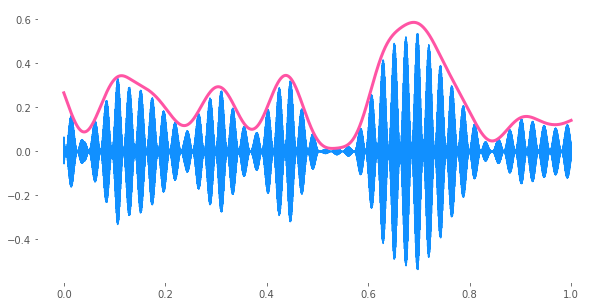

In [20]:
fs = 48000.
start = int(fs*2)
end = int(fs*3)

data = audio[start:end, 0]


flatui = ["#1190FF", "#FF54A4"]
sns.set_palette(flatui)

f = plt.figure()
plt.plot(np.arange(data.shape[0])/fs, data)
plt.plot(np.arange(data.shape[0])/fs, envFilt[start:end]*2, linewidth=3)
plt.show()
f.savefig("images/envAM.png", dpi=500)

In [14]:
audioAM, fsAM = sf.read('audio/AM.wav')
trialLenFastHilbertAM = fftpack.next_fast_len(audio.shape[0])
envAM = np.abs(signal.hilbert(audioAM, N=trialLenFastHilbertAM))
# envFilt = butterLpass(env, cutoff=15, fs=48000., order=5)

(2646,)


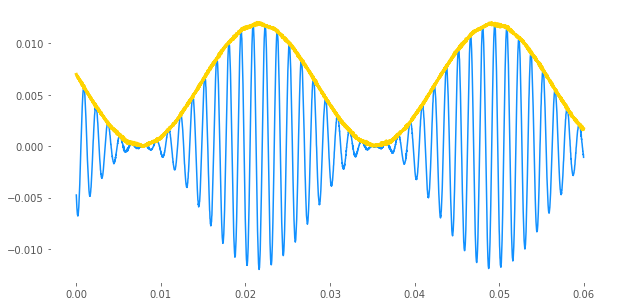

In [22]:
fsAM = float(fsAM)
start = int(fsAM*2.07)
end = int(fsAM*2.13)

flatui1 = ["#1190FF", "#FFD400"]
sns.set_palette(flatui1)

data = audioAM[start:end]
print data.shape

f = plt.figure()
plt.plot(np.arange(data.shape[0])/fsAM, data)
plt.plot(np.arange(data.shape[0])/fsAM, envAM[start:end], linewidth=3)
plt.show()
f.savefig("images/AM.png", dpi=500)

<IPython.core.display.Javascript object>


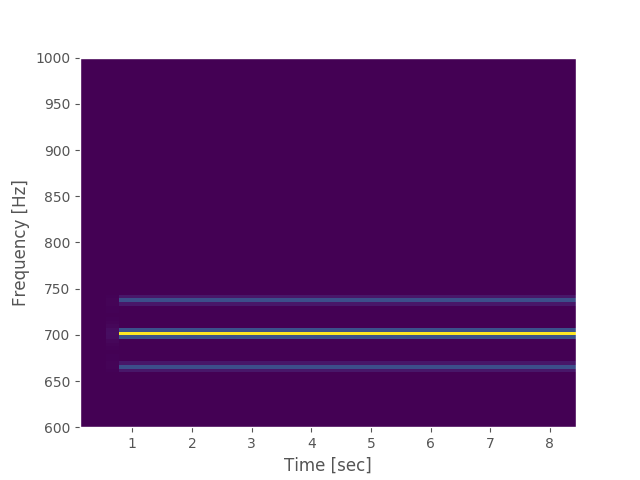

In [53]:
f, t, Sxx = signal.spectrogram(audioAM, fsAM, nperseg=11025, window='hanning')
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(600, 1000)

plt.show()

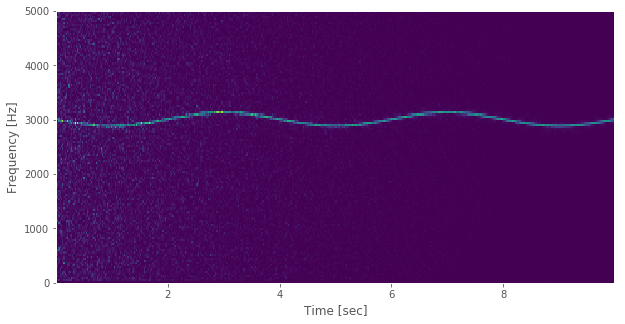

In [25]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()